### why to to Feature scaling:?
1) linear regression:
coefficients of linear regression are found out with the help of gradient descent. coefficints should converge to global minima.we not  scaled, then randomly selected coefficients may be far away from global minima.

2) Kmeans clustering & 3)knn: we use euclidian distance. if not scaled down then we can see huge distance

4) deep learning


### when not to apply feature scaling?
1. decision tree
2. random forest
3. ensemble techniques

# standard scaler

In [2]:
# https://scikit-learn.org/stable/modules/preprocessing.html

# standard scalar: works on Z-score
# need to check how distribution changing after z-score


import pandas as pd
rain = pd.read_csv('Rain Prediction Train.csv')
rain.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No


In [11]:
import seaborn as sb


In [16]:
from matplotlib import pyplot as plt       # or import matplotlib.pyplot as plt

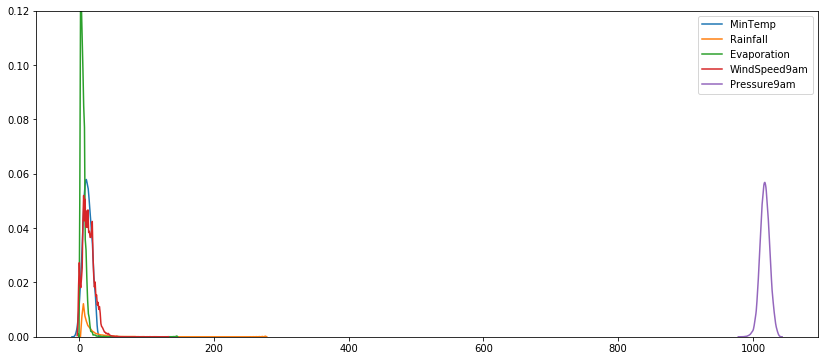

In [24]:
plt.figure(figsize=(14,6))                         # before standard scaler
plt.ylim(0,0.12)
sb.kdeplot(rain['MinTemp'])
sb.kdeplot(rain['Rainfall'])
sb.kdeplot(rain['Evaporation'])
sb.kdeplot(rain['WindSpeed9am'])
sb.kdeplot(rain['Pressure9am'])

In [18]:
from sklearn.preprocessing import StandardScaler

In [61]:
data1 = rain[['MinTemp','Rainfall','Evaporation','WindSpeed9am','Pressure9am']]
data1 = data1.dropna()                #apply different strategy to fill na instead of dropna

In [26]:
sc= StandardScaler()                       #standard scaler
data_sc = sc.fit_transform(data1) 
data_sc = pd.DataFrame(data_sc)
data_sc.columns=data1.columns

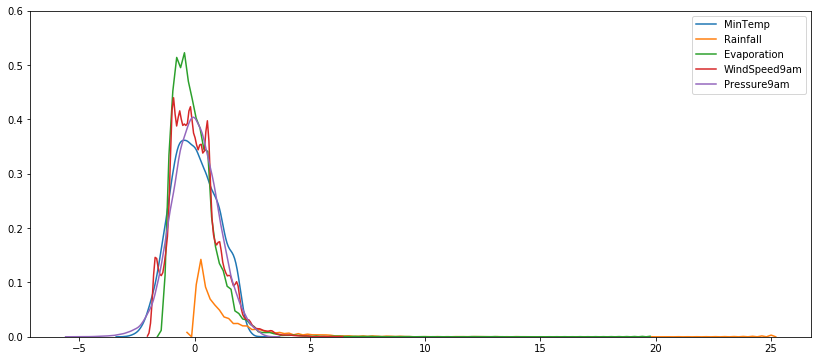

In [31]:
plt.figure(figsize=(14,6))          # after standard scaler   but not in almost same range
plt.ylim(0,0.6)
sb.kdeplot(data_sc['MinTemp'])
sb.kdeplot(data_sc['Rainfall'])
sb.kdeplot(data_sc['Evaporation'])
sb.kdeplot(data_sc['WindSpeed9am'])
sb.kdeplot(data_sc['Pressure9am'])

In [33]:
data1.describe()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
count,56768.000000,56768.000000,56768.000000,56768.000000,56768.000000
mean,13.046102,2.051268,5.465919,14.720635,1017.404959
std,6.405527,6.603820,4.149902,8.597672,7.025719
min,-6.500000,0.000000,0.000000,0.000000,980.500000
25%,8.300000,0.000000,2.600000,9.000000,1012.800000
50%,12.700000,0.000000,4.800000,13.000000,1017.400000
75%,17.800000,0.600000,7.400000,20.000000,1022.100000
max,33.900000,168.400000,86.200000,67.000000,1040.900000


In [34]:
data_sc.describe()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
count,5.676800e+04,5.676800e+04,5.676800e+04,5.676800e+04,5.676800e+04
mean,2.690093e-17,-1.353734e-15,-1.867165e-16,7.384602e-16,-2.264086e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.051470e+00,-3.106212e-01,-1.317132e+00,-1.712180e+00,-5.252884e+00
25%,-7.409450e-01,-3.106212e-01,-6.906053e-01,-6.653761e-01,-6.554489e-01
50%,-5.403220e-02,-3.106212e-01,-1.604677e-01,-2.001298e-01,-7.058101e-04
75%,7.421622e-01,-2.197639e-01,4.660587e-01,6.140513e-01,6.682708e-01
max,3.255639e+00,2.519000e+01,1.945463e+01,6.080696e+00,3.344177e+00


# Min Max scaler

In [36]:
# to make all variables in the same range
# when normality is not an assumption
#x - x(min)/x(max)-x(min)
# data will be in the range (-1,0,1) provided nomissing values
# if data having the outlier, then min and max values will be outliers value. so outliers impact the concept/characteristic
# so whenever there are any outlier then do not go with min-max 
# not use this for linear data

In [54]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()                       #standard scaler
data_mmc = mmc.fit_transform(data1) 
data_mmc = pd.DataFrame(data_mmc)
data_mmc.columns=data1.columns

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


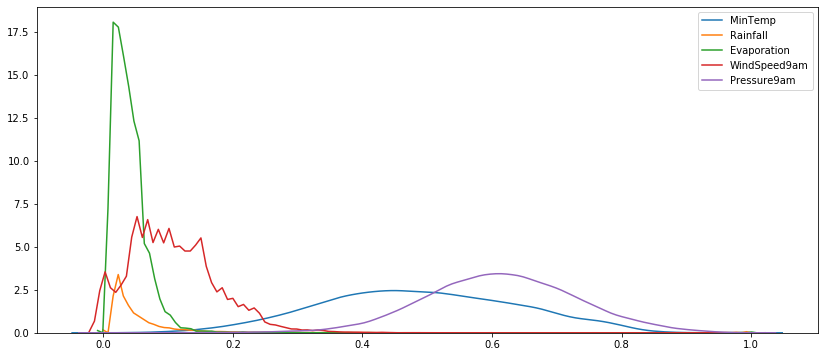

In [55]:
plt.figure(figsize=(14,6))          # after standard scaler   but not in almost same range
#plt.ylim(0)
sb.kdeplot(data_mmc['MinTemp'])
sb.kdeplot(data_mmc['Rainfall'])
sb.kdeplot(data_mmc['Evaporation'])
sb.kdeplot(data_mmc['WindSpeed9am'])
sb.kdeplot(data_mmc['Pressure9am'])

In [44]:
data_mmc.describe()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
count,56768.000000,56768.000000,56768.000000,56768.000000,56768.000000
mean,0.483814,0.012181,0.063410,0.219711,0.611009
std,0.158553,0.039215,0.048143,0.128323,0.116320
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.366337,0.000000,0.030162,0.134328,0.534768
50%,0.475248,0.000000,0.055684,0.194030,0.610927
75%,0.601485,0.003563,0.085847,0.298507,0.688742
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Robust SCaler

In [56]:
# to make all variables in the same range
#x - x(25%)/x(75%)-x(25%)
# good to use this even when outliers are present
# used for linear data

from sklearn.preprocessing import RobustScaler
rc=RobustScaler()                       #robust scaler
data_rc = rc.fit_transform(data1) 
data_rc = pd.DataFrame(data_rc)
data_rc.columns=data1.columns

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


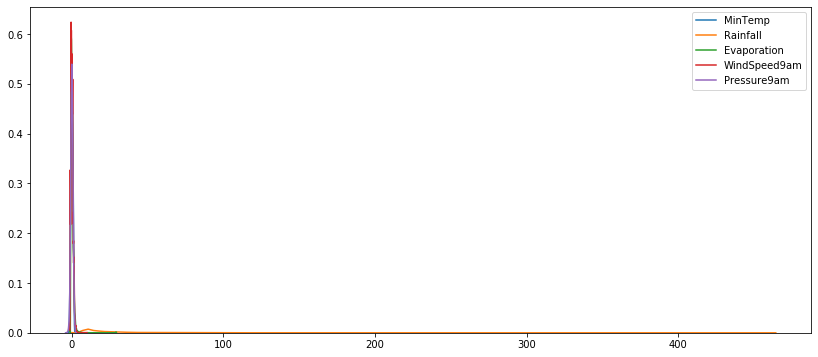

In [57]:
plt.figure(figsize=(14,6))          # after robust scaler   
#plt.xlim(-2,1)
sb.kdeplot(data_rc['MinTemp'])
sb.kdeplot(data_rc['Rainfall'])
sb.kdeplot(data_rc['Evaporation'])
sb.kdeplot(data_rc['WindSpeed9am'])
sb.kdeplot(data_rc['Pressure9am'])

In [58]:
data_rc.describe()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
count,99564.000000,99030.000000,57367.000000,99062.000000,90163.000000
mean,0.020490,3.911470,0.139070,0.084004,0.003348
std,0.689554,13.929191,0.872213,0.741534,0.747942
min,-2.204301,0.000000,-1.000000,-1.083333,-3.905263
25%,-0.473118,0.000000,-0.458333,-0.500000,-0.494737
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.526882,1.000000,0.541667,0.500000,0.505263
max,2.354839,464.000000,29.208333,9.750000,2.463158


# Normalizer

In [ ]:
# wont work when NaN values present
# rarely use
# distribution is same. only scale got changed
# divide all obs / max value

In [62]:
from sklearn.preprocessing import Normalizer
nc=Normalizer()                       
data_nc = nc.fit_transform(data1) 
data_nc = pd.DataFrame(data_nc)
data_nc.columns=data1.columns

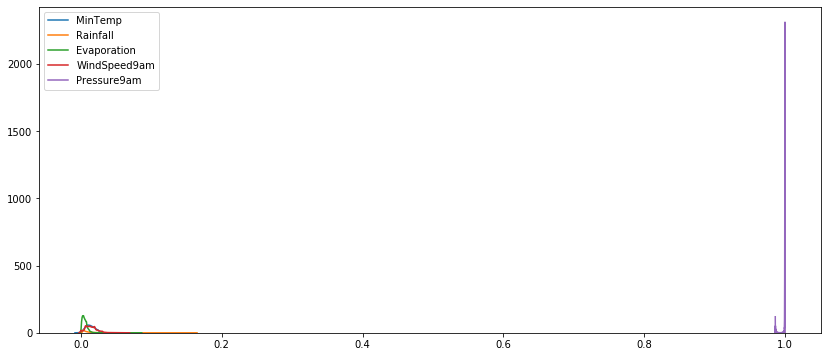

In [63]:
plt.figure(figsize=(14,6))             
#plt.xlim(-2,1)
sb.kdeplot(data_nc['MinTemp'])
sb.kdeplot(data_nc['Rainfall'])
sb.kdeplot(data_nc['Evaporation'])
sb.kdeplot(data_nc['WindSpeed9am'])
sb.kdeplot(data_nc['Pressure9am'])

In [64]:
data_nc.describe()

,MinTemp,Rainfall,Evaporation,WindSpeed9am,Pressure9am
count,56768.000000,56768.000000,56768.000000,56768.000000,56768.000000
mean,0.012839,0.002023,0.005378,0.014477,0.999711
std,0.006336,0.006513,0.004091,0.008477,0.000295
min,-0.006301,0.000000,0.000000,0.000000,0.986125
25%,0.008116,0.000000,0.002556,0.008784,0.999620
50%,0.012523,0.000000,0.004689,0.012855,0.999768
75%,0.017543,0.000593,0.007267,0.019513,0.999879
max,0.033569,0.164664,0.085074,0.066338,1.000000
